Dataset available for download at: https://www.dressipi-recsys2022.com/profile/download_dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from datetime import datetime
from numpy.lib.function_base import average

# Data Exploration

## *Dataframes*

In [4]:
train_sessions_df = pd.read_csv("../Dataset/train_sessions.csv", sep=',')
train_sessions_df

,session_id,item_id,date
0,3,9655,2020-12-18 21:25:00.373
1,3,9655,2020-12-18 21:19:48.093
2,13,15654,2020-03-13 19:35:27.136
3,18,18316,2020-08-26 19:18:30.833
4,18,2507,2020-08-26 19:16:31.211
...,...,...,...
4743815,4440001,20409,2020-10-30 23:37:20.658
4743816,4440001,14155,2020-10-30 23:31:56.607
4743817,4440001,14303,2020-10-30 23:36:17.934
4743818,4440001,27852,2020-10-30 23:39:55.186


In [5]:
train_purchases_df = pd.read_csv("../Dataset/train_purchases.csv", sep=',')
train_purchases_df

,session_id,item_id,date
0,3,15085,2020-12-18 21:26:47.986
1,13,18626,2020-03-13 19:36:15.507
2,18,24911,2020-08-26 19:20:32.049
3,19,12534,2020-11-02 17:16:45.92
4,24,13226,2020-02-26 18:27:44.114
...,...,...,...
999995,4439986,2915,2021-05-13 11:56:37.464
999996,4439990,8786,2020-08-22 14:28:22.382
999997,4439994,21630,2020-11-27 20:10:28.961
999998,4439999,16962,2020-11-27 11:01:41.356


In [6]:
test_leaderboard_sessions_df = pd.read_csv("../Dataset/test_leaderboard_sessions.csv", sep=',')
test_leaderboard_sessions_df

,session_id,item_id,date
0,26,19185,2021-06-16 09:53:54.158
1,200,17089,2021-06-25 12:23:40.811
2,200,17089,2021-06-25 12:24:36.631
3,200,8060,2021-06-25 12:24:41.677
4,200,4758,2021-06-25 12:24:50.692
...,...,...,...
229349,4439653,25955,2021-06-11 10:22:57.47
229350,4439653,12179,2021-06-11 10:23:00.663
229351,4439757,2078,2021-06-30 11:42:15.073
229352,4439757,2078,2021-06-30 11:43:13.725


In [7]:
test_final_sessions_df = pd.read_csv("../Dataset/test_final_sessions.csv", sep=',')
test_final_sessions_df

,session_id,item_id,date
0,61,27088,2021-06-01 08:12:39.664
1,96,11693,2021-06-19 17:48:05.227
2,96,18298,2021-06-19 17:49:08.589
3,96,4738,2021-06-19 17:49:15.838
4,96,495,2021-06-19 17:49:20.88
...,...,...,...
226133,4439648,7154,2021-06-14 08:03:19.024
226134,4439675,23067,2021-06-01 12:21:07.959
226135,4439868,26085,2021-06-16 22:18:27.509
226136,4439966,19483,2021-06-06 20:05:06.457


In [8]:
item_features_df = pd.read_csv("../Dataset/item_features.csv", sep=',')
item_features_df

,item_id,feature_category_id,feature_value_id
0,2,56,365
1,2,62,801
2,2,68,351
3,2,33,802
4,2,72,75
...,...,...,...
471746,28143,68,351
471747,28143,55,390
471748,28143,11,109
471749,28143,73,91


In [9]:
candidate_items_df = pd.read_csv("../Dataset/candidate_items.csv", sep=',')
candidate_items_df

,item_id
0,4
1,8
2,9
3,19
4,20
...,...
4985,28128
4986,28131
4987,28132
4988,28133


## *General Information*

In [10]:
print("Train sessions dataframe\n")

session_ids_train = train_sessions_df['session_id'].unique()
item_ids_train = train_sessions_df['item_id'].unique()

n_sessions_train = len(session_ids_train)
n_items_train = len(item_ids_train)

print("Number of total views: {}".format(len(train_sessions_df)))
print("Number of unique sessions: {}".format(n_sessions_train))
print("Number of unique items: {}".format(n_items_train))
print("Min ID sessions: {}, Max ID sessions: {}".format(min(session_ids_train), max(session_ids_train)))
print("Min ID items: {}, Max ID items: {}".format(min(item_ids_train), max(item_ids_train)))

Train sessions dataframe

Number of total views: 4743820
Number of unique sessions: 1000000
Number of unique items: 23496
Min ID sessions: 3, Max ID sessions: 4440001
Min ID items: 2, Max ID items: 28143


In [11]:
print("Train purchases dataframe\n")

session_ids_purchases = train_purchases_df['session_id'].unique()
item_ids_purchases = train_purchases_df['item_id'].unique()

n_sessions_purchases = len(session_ids_purchases)
n_items_purchases = len(item_ids_purchases)

print("Number of total purchases: {}".format(len(train_purchases_df)))
print("Number of unique sessions: {}".format(n_sessions_purchases))
print("Number of unique items: {}".format(n_items_purchases))
print("Min ID sessions: {}, Max ID sessions: {}".format(min(session_ids_purchases), max(session_ids_purchases)))
print("Min ID items: {}, Max ID items: {}".format(min(item_ids_purchases), max(item_ids_purchases)))

Train purchases dataframe

Number of total purchases: 1000000
Number of unique sessions: 1000000
Number of unique items: 18907
Min ID sessions: 3, Max ID sessions: 4440001
Min ID items: 3, Max ID items: 28143


In [12]:
print("Test leaderboard sessions dataframe\n")

session_ids_leaderboard = test_leaderboard_sessions_df['session_id'].unique()
item_ids_leaderboard = test_leaderboard_sessions_df['item_id'].unique()

n_sessions_leaderboard = len(session_ids_leaderboard)
n_items_leaderboard = len(item_ids_leaderboard)

print("Number of total views: {}".format(len(test_leaderboard_sessions_df)))
print("Number of unique sessions: {}".format(n_sessions_leaderboard))
print("Number of unique items: {}".format(n_items_leaderboard))
print("Min ID sessions: {}, Max ID sessions: {}".format(min(session_ids_leaderboard), max(session_ids_leaderboard)))
print("Min ID items: {}, Max ID items: {}".format(min(item_ids_leaderboard), max(item_ids_leaderboard)))

Test leaderboard sessions dataframe

Number of total views: 229354
Number of unique sessions: 50000
Number of unique items: 5647
Min ID sessions: 26, Max ID sessions: 4439757
Min ID items: 4, Max ID items: 28137


In [13]:
print("Test final sessions dataframe\n")

session_ids_final = test_final_sessions_df['session_id'].unique()
item_ids_final = test_final_sessions_df['item_id'].unique()

n_sessions_final = len(session_ids_final)
n_items_final = len(item_ids_final)

print("Number of total views: {}".format(len(test_final_sessions_df)))
print("Number of unique sessions: {}".format(n_sessions_final))
print("Number of unique items: {}".format(n_items_final))
print("Min ID sessions: {}, Max ID sessions: {}".format(min(session_ids_final), max(session_ids_final)))
print("Min ID items: {}, Max ID items: {}".format(min(item_ids_final), max(item_ids_final)))

Test final sessions dataframe

Number of total views: 226138
Number of unique sessions: 50000
Number of unique items: 5648
Min ID sessions: 61, Max ID sessions: 4439966
Min ID items: 3, Max ID items: 28137


In [14]:
print("Candidate items dataframe\n")

items_ids_candidate = candidate_items_df['item_id'].unique()

print("Number of candidate items: {}".format(len(items_ids_candidate)))

Candidate items dataframe

Number of candidate items: 4990


In [15]:
print("Item features dataframe\n")

item_ids_features = item_features_df['item_id'].unique()

print("Number of unique items: {}".format(len(item_ids_features)))
print("Min ID items: {}, Max ID items: {}".format(min(item_ids_features), max(item_ids_features)))

Item features dataframe

Number of unique items: 23691
Min ID items: 2, Max ID items: 28143


## **Anomaly Detection**

In [16]:
print(train_sessions_df.isnull().values.any())
print(train_purchases_df.isnull().values.any())
print(test_leaderboard_sessions_df.isnull().values.any())
print(test_final_sessions_df.isnull().values.any())
print(item_features_df.isnull().values.any())
print(candidate_items_df.isnull().values.any())

False
False
False
False
False
False


There are no NULL values in the dataframes

In [17]:
train_sessions_df_sorted = train_sessions_df.sort_values('date')
train_sessions_df_sorted

,session_id,item_id,date
4005618,3747794,11234,2020-01-01 00:00:01.359
3699175,3458777,3868,2020-01-01 00:00:21.44
4005616,3747794,9214,2020-01-01 00:00:22.294
4649622,4350716,10861,2020-01-01 00:00:48.505
4005614,3747794,27092,2020-01-01 00:02:14.538
...,...,...,...
2007607,1876524,18969,2021-05-31 23:41:37.372
3927982,3674124,2267,2021-05-31 23:41:49.965
2007606,1876524,11226,2021-05-31 23:42:01.479
3927983,3674124,23412,2021-05-31 23:43:02.747


train_sessions_df: 17 months of data, from 1st Jan 2020 to 31st May 2021

In [18]:
session_ids_sorted = np.sort(train_sessions_df['session_id'].unique())
session_purchase_ids_sorted = np.sort(train_purchases_df['session_id'].unique())
print("Session ids correspond: {}".format((session_ids_sorted == session_purchase_ids_sorted).all()))
session_ids_sorted, session_purchase_ids_sorted

Session ids correspond: True


(array([      3,      13,      18, ..., 4439994, 4439999, 4440001]),
 array([      3,      13,      18, ..., 4439994, 4439999, 4440001]))

Every session of train_sessions_df corresponds to a purchased item in train_purchases_df

In [19]:
train_sessions_sort_arr = np.array(train_sessions_df.sort_values('session_id'))
train_purchases_sort_arr = np.array(train_purchases_df.sort_values('session_id'))

train_sessions_idx = 0
error = False

for train_purchases_idx in range(len(train_purchases_sort_arr)):

  # index 0 - session_id, index 1 - item_id, index 2 - date
  while train_sessions_idx < len(train_sessions_sort_arr) and train_sessions_sort_arr[train_sessions_idx][0] == train_purchases_sort_arr[train_purchases_idx][0]:  # session

    if train_sessions_sort_arr[train_sessions_idx][1] == train_purchases_sort_arr[train_purchases_idx][1]:  # item
      print("Same item, error!")
      error = True

    if train_sessions_sort_arr[train_sessions_idx][2] > train_purchases_sort_arr[train_purchases_idx][2]:  # date
      print("Wrong purchase date, error!")
      error = True
      
    train_sessions_idx += 1

if not error:
  print("No errors!")

No errors!


All purchased items are NOT in their corresponding session

All purchased items have timestamp strictly larger than the corresponding views

In [20]:
test_leaderboard_sessions_df_sorted = test_leaderboard_sessions_df.sort_values('date')
test_leaderboard_sessions_df_sorted

,session_id,item_id,date
88990,1719459,18156,2021-06-01 00:01:01.019
193239,3740715,12205,2021-06-01 00:01:36.571
135216,2614780,8060,2021-06-01 00:01:36.689
88991,1719459,21138,2021-06-01 00:01:37.836
182243,3540851,23315,2021-06-01 00:02:28.161
...,...,...,...
26443,502146,12179,2021-06-30 23:47:57.863
60446,1164531,25699,2021-06-30 23:48:34.124
60447,1164531,19245,2021-06-30 23:48:41.642
60448,1164531,17574,2021-06-30 23:48:51.731


test_leaderboard_sessions_df: last month of data, from 1st Jun 2021 to 30th Jun 2021

In [21]:
np.isin(session_ids_leaderboard, session_ids_train).any()

False

No leaderboard test session id matches with a train session id

In [22]:
test_final_sessions_df_sorted = test_final_sessions_df.sort_values('date')
test_final_sessions_df_sorted

,session_id,item_id,date
64022,1261706,25389,2021-06-01 00:00:09.399
109254,2136231,4981,2021-06-01 00:00:16.52
64023,1261706,21310,2021-06-01 00:00:31.451
31384,621029,11226,2021-06-01 00:00:33.528
121673,2377643,12901,2021-06-01 00:00:34.844
...,...,...,...
79023,1557119,366,2021-06-30 23:20:46.049
47094,920628,13095,2021-06-30 23:20:59.132
176665,3475398,289,2021-06-30 23:22:19.131
54146,1051350,11693,2021-06-30 23:32:32.921


test_final_sessions_df: last month of data, from 1st Jun 2021 to 30th Jun 2021

**Test sessions have been randomly splitted between leaderboard and final test datasets**

In [23]:
np.isin(session_ids_final, session_ids_train).any()

False

In [24]:
np.isin(session_ids_final, session_ids_leaderboard).any()

False

No final test session id matches with a train session id or a test leaderboard session id

In [25]:
comp_item_ids = np.isin(item_ids_train, item_ids_features)
len(comp_item_ids[comp_item_ids==False])

0

In [26]:
comp_item_ids = np.isin(item_ids_purchases, item_ids_features)
len(comp_item_ids[comp_item_ids==False])

0

In [27]:
comp_item_ids = np.isin(item_ids_leaderboard, item_ids_features)
len(comp_item_ids[comp_item_ids==False])

0

In [28]:
comp_item_ids = np.isin(item_ids_final, item_ids_features)
len(comp_item_ids[comp_item_ids==False])

0

In [29]:
comp_item_ids = np.isin(items_ids_candidate, item_ids_features)
len(comp_item_ids[comp_item_ids==False])

0

Items of all dataframes have content data

## **Features Analysis**

In [30]:
feature_category_groupby = item_features_df.groupby(['feature_category_id'])
feature_value_groupby = item_features_df.groupby(['feature_value_id'])

print('Number of Feature Categories: {}'.format(len(feature_category_groupby)))
print('Number of Feature Values: {}'.format(len(feature_value_groupby)))

Number of Feature Categories: 73
Number of Feature Values: 890


### Items distribution over Feature Categories

In [31]:
category_itemcount = item_features_df[['item_id', 'feature_category_id']].drop_duplicates().groupby(['feature_category_id']).count()
category_itemcount.rename(columns={"item_id": "item_count"}, inplace=True)

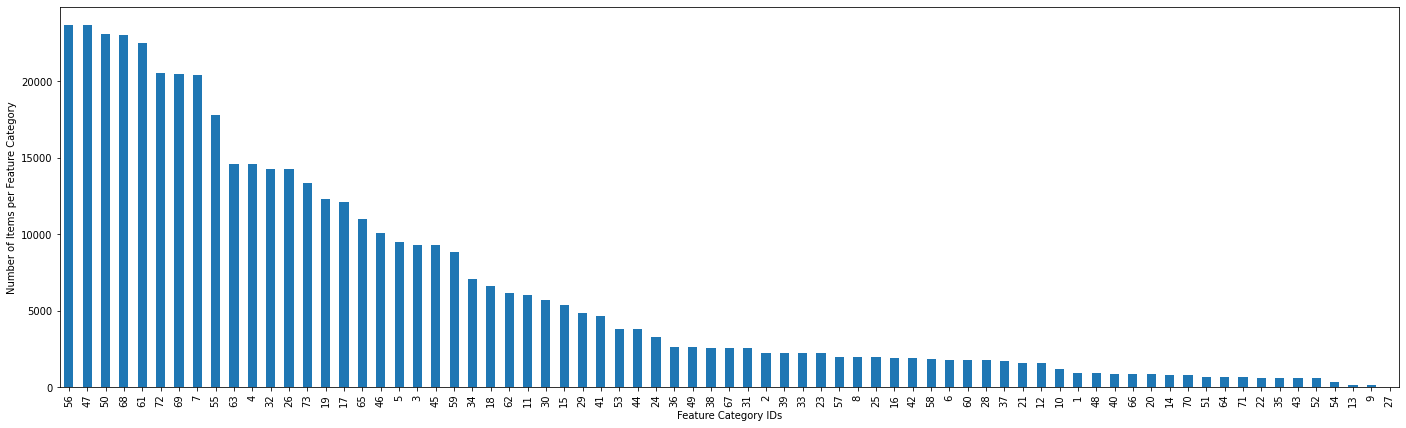

In [32]:
sorted_category_itemcount = category_itemcount['item_count'].sort_values(ascending=False)

sorted_category_itemcount.plot(kind='bar', figsize=(24,7))
plt.xlabel('Feature Category IDs')
plt.ylabel('Number of Items per Feature Category')
plt.show()

### Feature Values distribution over Feature Categories

In [33]:
category_valuecount = item_features_df[['feature_category_id', 'feature_value_id']].drop_duplicates().groupby(['feature_category_id']).count()
category_valuecount.rename(columns={"feature_value_id": "feature_value_count"}, inplace=True)

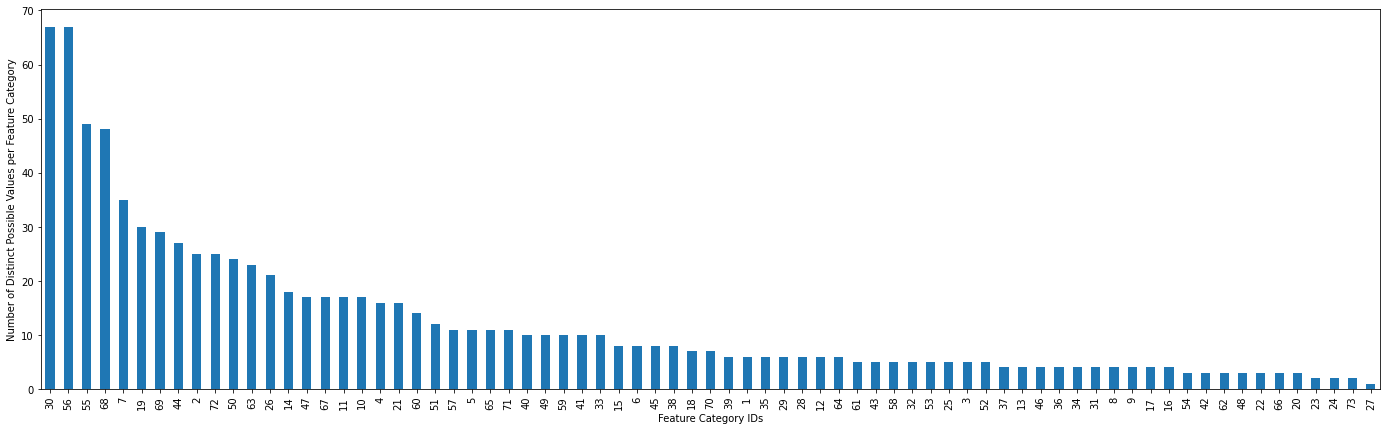

In [34]:
sorted_category_valuecount = category_valuecount['feature_value_count'].sort_values(ascending=False)

sorted_category_valuecount.plot(kind='bar', figsize=(24,7))
plt.xlabel('Feature Category IDs')
plt.ylabel('Number of Distinct Possible Values per Feature Category')
plt.show()

### Items distribution over Feature Values

In [35]:
value_itemcount = item_features_df[['item_id', 'feature_value_id']].drop_duplicates().groupby(['feature_value_id']).count()
value_itemcount.rename(columns={"item_id": "item_count"}, inplace=True)

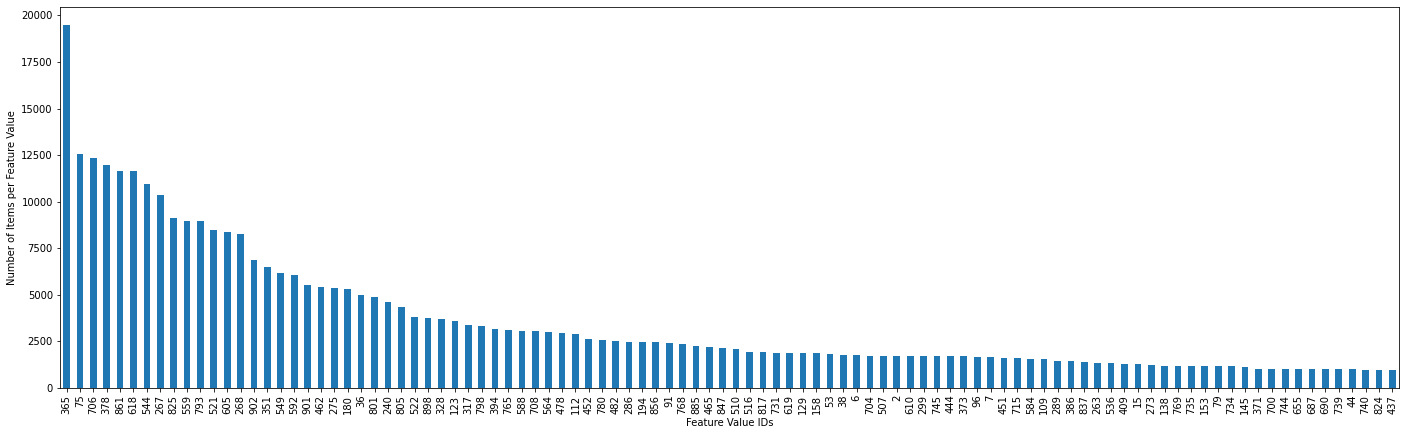

In [36]:
sorted_value_itemcount = value_itemcount['item_count'].sort_values(ascending=False)

sorted_value_itemcount[:100].plot(kind='bar', figsize=(24,7))
plt.xlabel('Feature Value IDs')
plt.ylabel('Number of Items per Feature Value')
plt.show()

Note: only the first 100 values are shown

### Feature Categories distribution over Items

In [37]:
value_categorycount = item_features_df[['item_id', 'feature_category_id']].drop_duplicates().groupby(['item_id']).count()
value_categorycount.rename(columns={"feature_category_id": "feature_category_count"}, inplace=True)

In [38]:
sorted_value_categorycount = value_categorycount['feature_category_count'].sort_values(ascending=False)

print('Max number of feature categories per item: {}'.format(max(value_categorycount['feature_category_count'])))
print('Min number of feature categories per item: {}'.format(min(value_categorycount['feature_category_count'])))
print('Average number of feature categories per item: {}'.format(round(np.average(value_categorycount['feature_category_count']))))
print('Median number of feature categories per item: {}'.format(sorted_value_categorycount[int(len(sorted_value_categorycount) / 2)]))

Max number of feature categories per item: 27
Min number of feature categories per item: 2
Average number of feature categories per item: 19
Median number of feature categories per item: 20


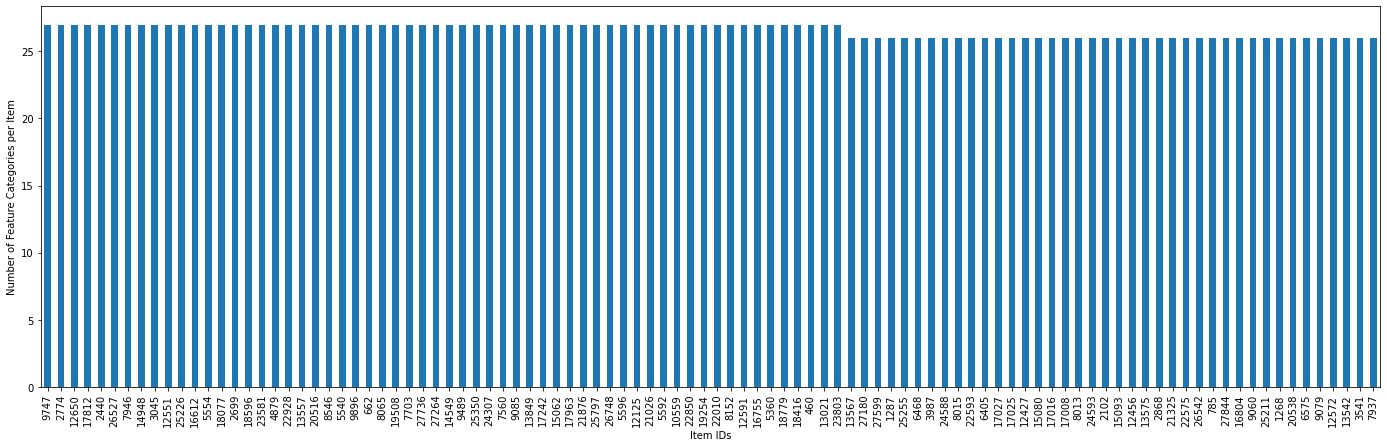

In [39]:
sorted_value_categorycount[:100].plot(kind='bar', figsize=(24,7))
plt.xlabel('Item IDs')
plt.ylabel('Number of Feature Categories per Item')
plt.show()

Note: only the first 100 values are shown

### Multi-category Value IDs

In [40]:
category_value_df = item_features_df[['feature_category_id', 'feature_value_id']].drop_duplicates()

# If the feature_value_id column has some repeated values, it means that a single value-id can be associated to different feature categories

if not category_value_df['feature_value_id'].is_unique:
  print('Some Value-IDs are multi-category')

Some Value-IDs are multi-category


In [41]:
multi_category_value_ids = category_value_df[category_value_df['feature_value_id'].duplicated()]['feature_value_id'].values
multi_category_value_ids

array([123,  96, 194,  36, 418, 541,  32, 752, 273, 439, 400,  39, 184,
       164])

In [42]:
print("There are {} multi-category value IDs".format(len(multi_category_value_ids)))

There are 14 multi-category value IDs


### Items with Features but without Interactions

In [43]:
item_features_arr = item_features_df['item_id'].unique()
item_features_arr, len(item_features_arr)

(array([    2,     3,     4, ..., 28141, 28142, 28143]), 23691)

In [44]:
train_item_ids = train_sessions_df['item_id'].unique()
train_purchases_item_ids = train_purchases_df['item_id'].unique()
leaderboard_item_ids = test_leaderboard_sessions_df['item_id'].unique()
final_item_ids = test_final_sessions_df['item_id'].unique()
candidate_item_ids = candidate_items_df['item_id'].unique()

In [45]:
items_no_interactions = item_features_arr[~np.isin(item_features_arr, train_item_ids)]
items_no_interactions = items_no_interactions[~np.isin(items_no_interactions, train_purchases_item_ids)]
items_no_interactions = items_no_interactions[~np.isin(items_no_interactions, leaderboard_item_ids)]
items_no_interactions = items_no_interactions[~np.isin(items_no_interactions, final_item_ids)]
items_no_interactions, len(items_no_interactions)

(array([ 8814, 17576, 20237, 26201]), 4)

Only 4 items have no interactions in the entire dataset (less than 0.02% of total items)

## **Session Analysis**

### Sessions with multiple-viewed items

In [46]:
train_sessions_with_duplicates = train_sessions_df[train_sessions_df.duplicated(['session_id', 'item_id'])]['session_id'].unique()
print(len(train_sessions_with_duplicates)/train_sessions_df['session_id'].nunique() * 100)

28.4972


About 28% of the train sessions have multiple views with the same items

In [47]:
lb_sessions_with_duplicates = test_leaderboard_sessions_df[test_leaderboard_sessions_df.duplicated(['session_id', 'item_id'])]['session_id'].unique()
print(len(lb_sessions_with_duplicates)/test_leaderboard_sessions_df['session_id'].nunique() * 100)

33.454


About 33% of the test leaderboard sessions have multiple views with the same items

In [48]:
fin_sessions_with_duplicates = test_final_sessions_df[test_final_sessions_df.duplicated(['session_id', 'item_id'])]['session_id'].unique()
print(len(fin_sessions_with_duplicates)/test_final_sessions_df['session_id'].nunique() * 100)

33.116


About 33% of the test final sessions have multiple views with the same items

### Session length

**Train sessions**

In [49]:
train_sessions_length = train_sessions_df.groupby('session_id').count().reset_index()
train_sessions_length = train_sessions_length.drop('date', 1)
train_sessions_length.columns = ['session_id', 'length']
train_sessions_length = train_sessions_length.sort_values(by='length', ascending=False)

train_sessions_length

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,session_id,length
836726,3715268,100
12190,54433,100
204926,913190,100
68427,305141,100
690587,3067101,100
...,...,...
745835,3311121,1
364451,1619540,1
745832,3311099,1
364464,1619592,1


In [50]:
train_sessions_length['length'].value_counts().sort_index()

1      307698
2      174775
3      115499
4       82306
5       60695
        ...  
96          6
97         12
98          5
99          5
100         6
Name: length, Length: 100, dtype: int64

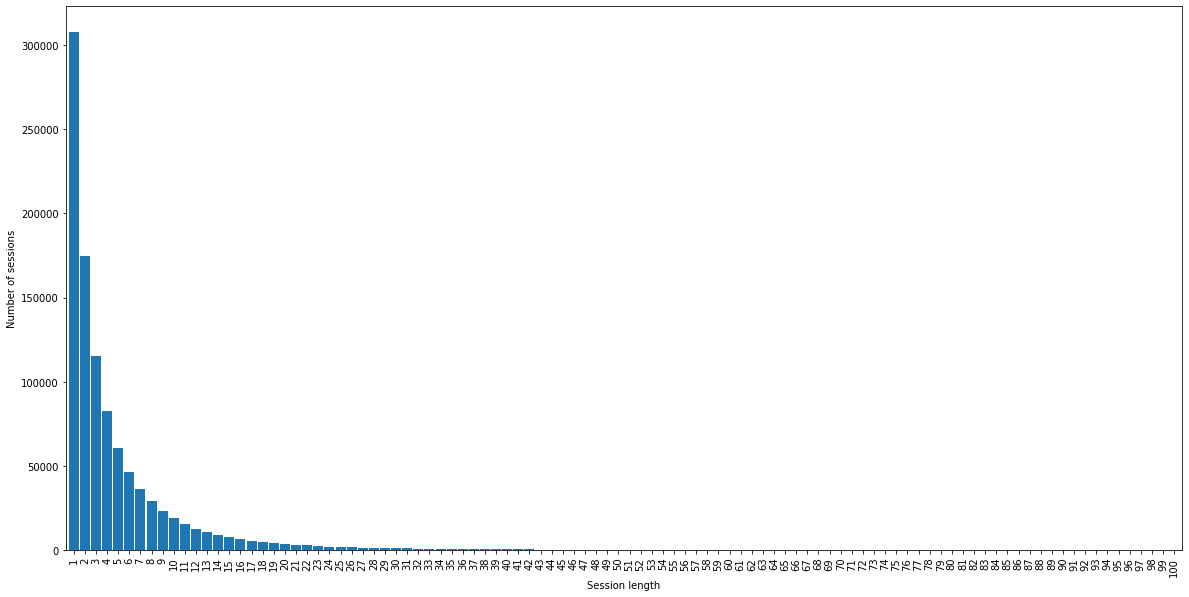

In [51]:
train_sessions_length['length'].value_counts().sort_index().plot(kind='bar', width=0.9, figsize=(20, 10))
plt.xlabel("Session length")
plt.ylabel("Number of sessions")
plt.show()

In [52]:
mean_session_itemcount = train_sessions_length['length'].mean()
print('Mean sessions length: ' +str(mean_session_itemcount) + ' item')
median_session_itemcount = train_sessions_length['length'].median()
print('Median sessions length: ' +str(median_session_itemcount) + ' item')
mode_session_itemcount = train_sessions_length['length'].mode()[0]
print('Mode sessions length: ' +str(mode_session_itemcount) + ' item')
max_session_itemcount = train_sessions_length['length'].max()
print('Session with the longest number of view is of: ' + str(max_session_itemcount) + ' item')
min_session_itemcount = train_sessions_length['length'].min()
print('Min session length: ' + str(min_session_itemcount) + ' item')

Mean sessions length: 4.74382 item
Median sessions length: 3.0 item
Mode sessions length: 1 item
Session with the longest number of view is of: 100 item
Min session length: 1 item


**Test Leaderboard Sessions**

In [53]:
test_lb_sessions_length = test_leaderboard_sessions_df.groupby('session_id').count().reset_index()
test_lb_sessions_length = test_lb_sessions_length.drop('date', 1)
test_lb_sessions_length.columns = ['session_id', 'length']
test_lb_sessions_length = test_lb_sessions_length.sort_values(by='length', ascending=False)

test_lb_sessions_length

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,session_id,length
40818,3637162,72
28472,2538928,71
18642,1664732,70
47292,4201903,69
16403,1467067,69
...,...,...
25120,2242551,1
25114,2241626,1
25113,2241520,1
25110,2241245,1


In [54]:
test_lb_sessions_length['length'].value_counts().sort_index()

1     17036
2      7994
3      5444
4      3766
5      2844
      ...  
68        4
69        3
70        1
71        1
72        1
Name: length, Length: 69, dtype: int64

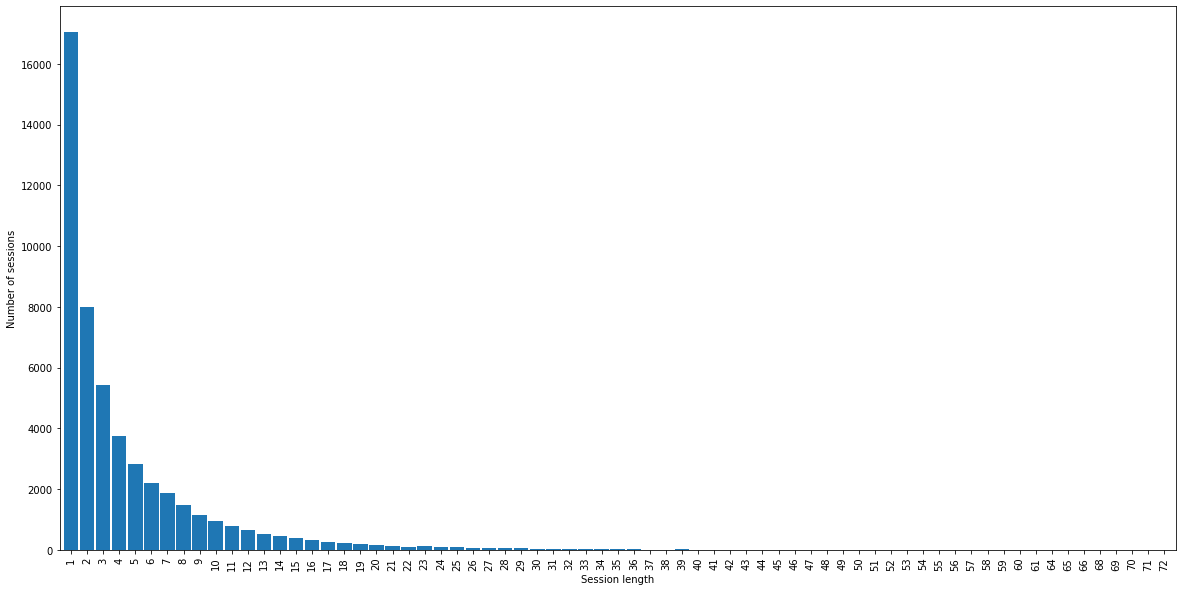

In [55]:
test_lb_sessions_length['length'].value_counts().sort_index().plot(kind='bar', width=0.9, figsize=(20, 10))
plt.xlabel("Session length")
plt.ylabel("Number of sessions")
plt.show()

In [56]:
mean_session_itemcount = test_lb_sessions_length['length'].mean()
print('Mean sessions length: ' +str(mean_session_itemcount) + ' item')
median_session_itemcount = test_lb_sessions_length['length'].median()
print('Median sessions length: ' +str(median_session_itemcount) + ' item')
mode_session_itemcount = test_lb_sessions_length['length'].mode()[0]
print('Mode sessions length: ' +str(mode_session_itemcount) + ' item')
max_session_itemcount = test_lb_sessions_length['length'].max()
print('Session with the longest number of view is of: ' + str(max_session_itemcount) + ' item')
min_session_itemcount = test_lb_sessions_length['length'].min()
print('Min session length: ' + str(min_session_itemcount) + ' item')

Mean sessions length: 4.58708 item
Median sessions length: 2.0 item
Mode sessions length: 1 item
Session with the longest number of view is of: 72 item
Min session length: 1 item


**Test Final Sessions**

In [57]:
test_fin_sessions_length = test_final_sessions_df.groupby('session_id').count().reset_index()
test_fin_sessions_length = test_fin_sessions_length.drop('date', 1)
test_fin_sessions_length.columns = ['session_id', 'length']
test_fin_sessions_length = test_fin_sessions_length.sort_values(by='length', ascending=False)

test_fin_sessions_length

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,session_id,length
7652,683170,74
10232,908390,73
10600,942349,72
258,22304,71
1096,92071,71
...,...,...
17851,1588404,1
36528,3240231,1
17854,1588665,1
36526,3240111,1


In [58]:
test_fin_sessions_length['length'].value_counts().sort_index()

1     16943
2      8008
3      5427
4      3983
5      2915
      ...  
69        2
71        4
72        1
73        1
74        1
Name: length, Length: 71, dtype: int64

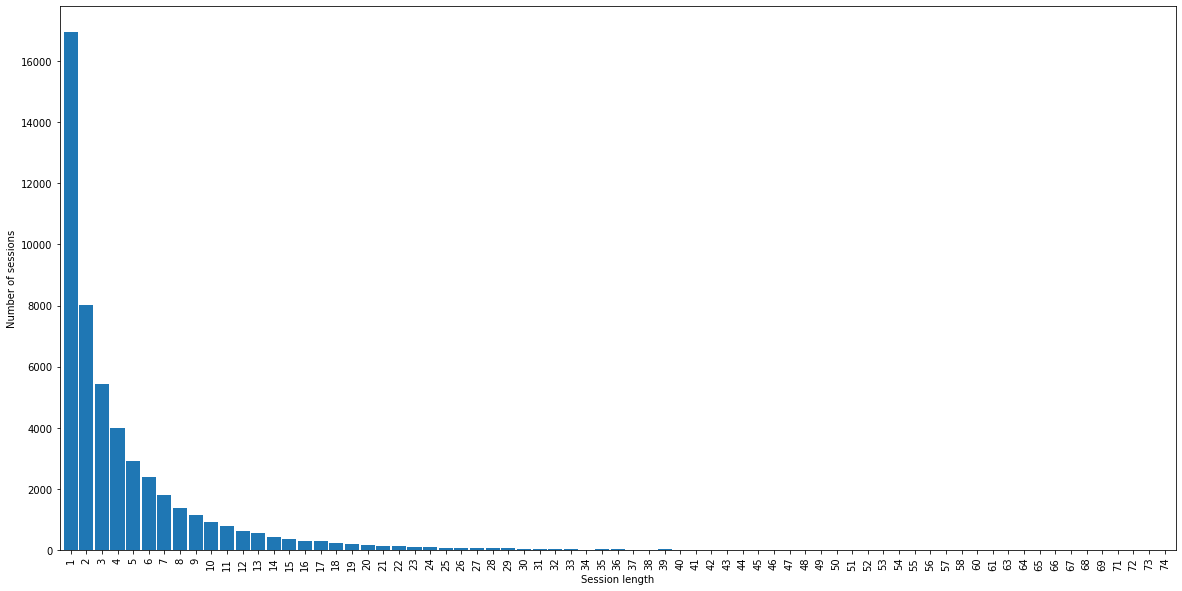

In [59]:
test_fin_sessions_length['length'].value_counts().sort_index().plot(kind='bar', width=0.9, figsize=(20, 10))
plt.xlabel("Session length")
plt.ylabel("Number of sessions")
plt.show()

In [60]:
mean_session_itemcount = test_fin_sessions_length['length'].mean()
print('Mean sessions length: ' +str(mean_session_itemcount) + ' item')
median_session_itemcount = test_fin_sessions_length['length'].median()
print('Median sessions length: ' +str(median_session_itemcount) + ' item')
mode_session_itemcount = test_fin_sessions_length['length'].mode()[0]
print('Mode sessions length: ' +str(mode_session_itemcount) + ' item')
max_session_itemcount = test_fin_sessions_length['length'].max()
print('Session with the longest number of view is of: ' + str(max_session_itemcount) + ' item')
min_session_itemcount = test_fin_sessions_length['length'].min()
print('Min session length: ' + str(min_session_itemcount) + ' item')

Mean sessions length: 4.52276 item
Median sessions length: 3.0 item
Mode sessions length: 1 item
Session with the longest number of view is of: 74 item
Min session length: 1 item


### "Cold" sessions

In [61]:
all_items = item_features_df['item_id'].unique()
train_items = pd.concat([train_sessions_df['item_id'], train_purchases_df['item_id']]).unique()

cold_items = all_items[~np.isin(all_items, train_items)]

cold_items, len(cold_items)

(array([  313,   366,   575,  1152,  1364,  1883,  2497,  2523,  2677,
         2694,  3185,  3529,  3754,  3835,  4042,  4514,  5214,  5394,
         6171,  6853,  6873,  6916,  7204,  7780,  8758,  8771,  8814,
         9384,  9418,  9589, 10463, 10671, 11125, 11933, 12667, 13376,
        13618, 13943, 13972, 14395, 14622, 14723, 14967, 15601, 15629,
        16206, 17046, 17206, 17576, 18482, 18690, 18837, 19637, 20237,
        21241, 21444, 21904, 21927, 21998, 22030, 22316, 22703, 22746,
        24303, 25035, 25277, 25521, 26201, 26232, 26742, 27377, 27728,
        27826]), 73)

**Test Leaderboard Sessions**

In [62]:
lb_warm_sessions_df = test_leaderboard_sessions_df[~test_leaderboard_sessions_df['item_id'].isin(cold_items)]
lb_warm_sessions_df

,session_id,item_id,date
0,26,19185,2021-06-16 09:53:54.158
1,200,17089,2021-06-25 12:23:40.811
2,200,17089,2021-06-25 12:24:36.631
3,200,8060,2021-06-25 12:24:41.677
4,200,4758,2021-06-25 12:24:50.692
...,...,...,...
229349,4439653,25955,2021-06-11 10:22:57.47
229350,4439653,12179,2021-06-11 10:23:00.663
229351,4439757,2078,2021-06-30 11:42:15.073
229352,4439757,2078,2021-06-30 11:43:13.725


In [63]:
lb_all_session_ids = test_leaderboard_sessions_df['session_id'].unique()
lb_warm_session_ids = lb_warm_sessions_df['session_id'].unique()

lb_cold_session_ids = lb_all_session_ids[~np.isin(lb_all_session_ids, lb_warm_session_ids)]

lb_cold_session_ids, len(lb_cold_session_ids)

(array([    495,   11443,   16681,   17574,   19921,   28709,   34724,
          38448,   39655,   48592,   64967,   68965,   69366,   71080,
          73426,   90188,  104097,  115995,  123072,  123083,  132529,
         137849,  139547,  139905,  142114,  147844,  156575,  158405,
         160495,  163338,  168382,  173739,  175024,  175317,  176027,
         179741,  182926,  187761,  188104,  195556,  216168,  219118,
         230704,  238522,  242484,  243673,  243739,  261755,  263855,
         279292,  280152,  305682,  305763,  307823,  312286,  316322,
         341123,  359729,  363368,  369177,  369899,  378740,  383174,
         391019,  393279,  393493,  395293,  404208,  404894,  409487,
         409762,  411543,  413510,  423656,  426705,  433188,  436738,
         439876,  443620,  450396,  454642,  457216,  465832,  468622,
         495173,  522396,  536311,  545611,  554624,  561321,  570235,
         572552,  580428,  585205,  592806,  597856,  614718,  615903,
      

In [64]:
print(len(lb_cold_session_ids)/len(lb_all_session_ids) * 100)

1.34


1.34% of test leaderboard sessions ONLY contains cold item views!

**Test Final Sessions**

In [65]:
fin_warm_sessions_df = test_final_sessions_df[~test_final_sessions_df['item_id'].isin(cold_items)]
fin_warm_sessions_df

,session_id,item_id,date
0,61,27088,2021-06-01 08:12:39.664
1,96,11693,2021-06-19 17:48:05.227
2,96,18298,2021-06-19 17:49:08.589
3,96,4738,2021-06-19 17:49:15.838
4,96,495,2021-06-19 17:49:20.88
...,...,...,...
226133,4439648,7154,2021-06-14 08:03:19.024
226134,4439675,23067,2021-06-01 12:21:07.959
226135,4439868,26085,2021-06-16 22:18:27.509
226136,4439966,19483,2021-06-06 20:05:06.457


In [66]:
fin_all_session_ids = test_final_sessions_df['session_id'].unique()
fin_warm_session_ids = fin_warm_sessions_df['session_id'].unique()

fin_cold_session_ids = fin_all_session_ids[~np.isin(fin_all_session_ids, fin_warm_session_ids)]

fin_cold_session_ids, len(fin_cold_session_ids)

(array([   3183,    4657,    5531,    6857,   11738,   12076,   28833,
          49315,   49791,   50748,   55646,   79146,   84471,   90448,
          98232,  104024,  132062,  144033,  145327,  151790,  153962,
         168158,  170782,  178913,  187805,  200235,  201392,  204723,
         206287,  217122,  221079,  230793,  243587,  257165,  258265,
         262167,  267692,  269511,  290581,  292644,  295221,  301159,
         311122,  313238,  320349,  322570,  323055,  326080,  326671,
         331194,  334339,  341483,  346397,  351308,  352252,  353269,
         359109,  360453,  366458,  368996,  374580,  376844,  379337,
         385421,  386975,  389100,  400556,  400896,  415143,  420426,
         422501,  428375,  434575,  434989,  437630,  438714,  442463,
         449203,  464397,  473508,  478361,  484345,  484631,  492564,
         494231,  501397,  508196,  512223,  518620,  519525,  533869,
         535201,  535693,  537746,  541660,  551386,  552540,  560347,
      

In [67]:
print(len(fin_cold_session_ids)/len(fin_all_session_ids) * 100)

1.426


1.426% of test final sessions ONLY contains cold item views!

In [68]:
print((len(lb_cold_session_ids) + len(fin_cold_session_ids)) / (len(lb_all_session_ids) + len(fin_all_session_ids)) * 100)

1.383


1.383% of all test sessions ONLY contains cold item views!

## **Seasonalities**

In [69]:
train_purchases_df_2020 = train_purchases_df[train_purchases_df['date'] <= '2020-12-31 23:59:59']
train_purchases_df_2021 = train_purchases_df[train_purchases_df['date'] > '2020-12-31 23:59:59']

### Number of purchases by time slot

#### 2020

In [70]:
purchases_per_period_2020 = train_purchases_df_2020.copy()

purchases_per_period_2020['period'] = [(pd.Timestamp(elem).hour // 4 + 1) for elem in purchases_per_period_2020['date']]
purchases_per_period_2020['period'].replace({1: '00:00 - 03:59',
                                             2: '04:00 - 07:59',
                                             3: '08:00 - 11:59',
                                             4: '12:00 - 15:59',
                                             5: '16:00 - 19:59',
                                             6: '20:00 - 23:59'},
                                            inplace=True)
purchases_per_period_2020

,session_id,item_id,date,period
0,3,15085,2020-12-18 21:26:47.986,20:00 - 23:59
1,13,18626,2020-03-13 19:36:15.507,16:00 - 19:59
2,18,24911,2020-08-26 19:20:32.049,16:00 - 19:59
3,19,12534,2020-11-02 17:16:45.92,16:00 - 19:59
4,24,13226,2020-02-26 18:27:44.114,16:00 - 19:59
...,...,...,...,...
999994,4439982,25770,2020-05-06 14:26:22.778,12:00 - 15:59
999996,4439990,8786,2020-08-22 14:28:22.382,12:00 - 15:59
999997,4439994,21630,2020-11-27 20:10:28.961,20:00 - 23:59
999998,4439999,16962,2020-11-27 11:01:41.356,08:00 - 11:59


In [71]:
purchases_per_period_2020_count = purchases_per_period_2020.groupby(['period'])['session_id'].nunique()

purchases_per_period_2020_count

period
00:00 - 03:59     23945
04:00 - 07:59     47914
08:00 - 11:59    136721
12:00 - 15:59    149965
16:00 - 19:59    182537
20:00 - 23:59    146011
Name: session_id, dtype: int64

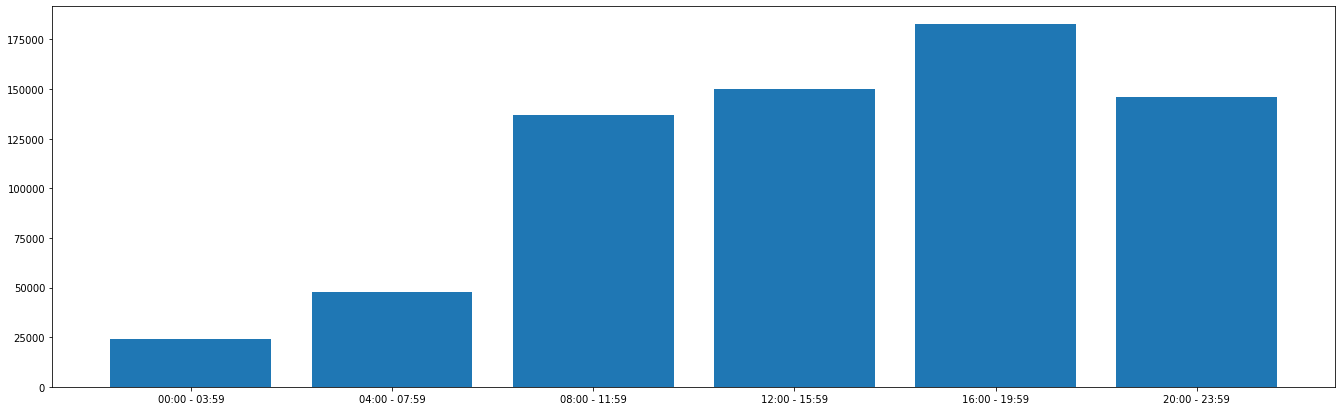

In [72]:
plt.figure(figsize=(23, 7))
plt.bar(purchases_per_period_2020_count.index, purchases_per_period_2020_count)
plt.show()

#### 2021

In [73]:
purchases_per_period_2021 = train_purchases_df_2021.copy()

purchases_per_period_2021['period'] = [(pd.Timestamp(elem).hour // 4 + 1) for elem in purchases_per_period_2021['date']]
purchases_per_period_2021['period'].replace({1: '00:00 - 03:59',
                                             2: '04:00 - 07:59',
                                             3: '08:00 - 11:59',
                                             4: '12:00 - 15:59',
                                             5: '16:00 - 19:59',
                                             6: '20:00 - 23:59'},
                                            inplace=True)
purchases_per_period_2021

,session_id,item_id,date,period
6,31,8345,2021-04-20 19:46:42.594,16:00 - 19:59
8,42,11784,2021-03-01 15:17:04.264,12:00 - 15:59
17,113,21107,2021-05-05 14:15:07.278,12:00 - 15:59
18,115,25976,2021-05-27 10:24:05.043,08:00 - 11:59
22,140,23502,2021-04-28 13:45:31.202,12:00 - 15:59
...,...,...,...,...
999982,4439936,8060,2021-04-16 14:52:33.804,12:00 - 15:59
999986,4439949,16439,2021-05-12 05:49:24.294,04:00 - 07:59
999987,4439952,12845,2021-03-03 19:34:55.343,16:00 - 19:59
999988,4439953,2612,2021-04-02 11:31:29.357,08:00 - 11:59


In [74]:
purchases_per_period_2021_count = purchases_per_period_2021.groupby(['period'])['session_id'].nunique()

purchases_per_period_2021_count

period
00:00 - 03:59    10184
04:00 - 07:59    15818
08:00 - 11:59    67742
12:00 - 15:59    76568
16:00 - 19:59    79526
20:00 - 23:59    63069
Name: session_id, dtype: int64

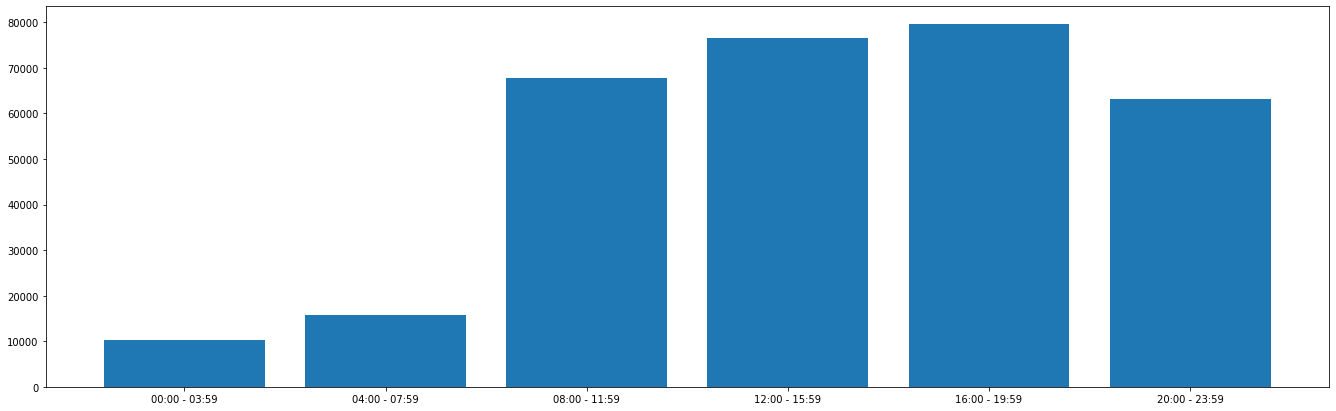

In [75]:
plt.figure(figsize=(23, 7))
plt.bar(purchases_per_period_2021_count.index, purchases_per_period_2021_count)
plt.show()

### Number of purchases by hour

#### 2020

In [76]:
purchases_per_hour_2020 = train_purchases_df_2020.copy()

purchases_per_hour_2020['hour'] = ['0{}:00 - 0{}:59'.format(pd.Timestamp(elem).hour, pd.Timestamp(elem).hour) if pd.Timestamp(elem).hour < 10
                                   else '{}:00 - {}:59'.format(pd.Timestamp(elem).hour, pd.Timestamp(elem).hour)
                                   for elem in purchases_per_hour_2020['date']]

purchases_per_hour_2020

,session_id,item_id,date,hour
0,3,15085,2020-12-18 21:26:47.986,21:00 - 21:59
1,13,18626,2020-03-13 19:36:15.507,19:00 - 19:59
2,18,24911,2020-08-26 19:20:32.049,19:00 - 19:59
3,19,12534,2020-11-02 17:16:45.92,17:00 - 17:59
4,24,13226,2020-02-26 18:27:44.114,18:00 - 18:59
...,...,...,...,...
999994,4439982,25770,2020-05-06 14:26:22.778,14:00 - 14:59
999996,4439990,8786,2020-08-22 14:28:22.382,14:00 - 14:59
999997,4439994,21630,2020-11-27 20:10:28.961,20:00 - 20:59
999998,4439999,16962,2020-11-27 11:01:41.356,11:00 - 11:59


In [77]:
purchases_per_hour_2020_count = purchases_per_hour_2020.groupby(['hour'])['session_id'].nunique()

purchases_per_hour_2020_count

hour
00:00 - 00:59     9830
01:00 - 01:59     5915
02:00 - 02:59     4457
03:00 - 03:59     3743
04:00 - 04:59     3881
05:00 - 05:59     6246
06:00 - 06:59    14009
07:00 - 07:59    23778
08:00 - 08:59    31019
09:00 - 09:59    34524
10:00 - 10:59    35146
11:00 - 11:59    36032
12:00 - 12:59    37877
13:00 - 13:59    37800
14:00 - 14:59    36327
15:00 - 15:59    37961
16:00 - 16:59    39448
17:00 - 17:59    41818
18:00 - 18:59    46790
19:00 - 19:59    54481
20:00 - 20:59    56061
21:00 - 21:59    46780
22:00 - 22:59    30823
23:00 - 23:59    12347
Name: session_id, dtype: int64

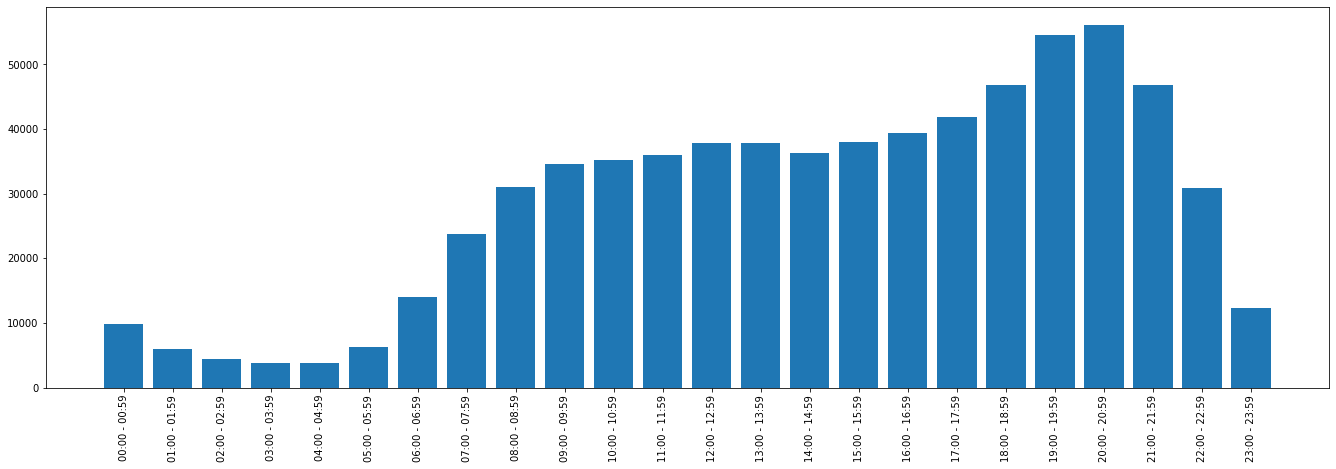

In [78]:
plt.figure(figsize=(23, 7))
plt.bar(purchases_per_hour_2020_count.index, purchases_per_hour_2020_count)
plt.xticks(rotation=90)
plt.show()

#### 2021

In [79]:
purchases_per_hour_2021 = train_purchases_df_2021.copy()

purchases_per_hour_2021['hour'] = ['0{}:00 - 0{}:59'.format(pd.Timestamp(elem).hour, pd.Timestamp(elem).hour) if pd.Timestamp(elem).hour < 10
                                   else '{}:00 - {}:59'.format(pd.Timestamp(elem).hour, pd.Timestamp(elem).hour)
                                   for elem in purchases_per_hour_2021['date']]

purchases_per_hour_2021

,session_id,item_id,date,hour
6,31,8345,2021-04-20 19:46:42.594,19:00 - 19:59
8,42,11784,2021-03-01 15:17:04.264,15:00 - 15:59
17,113,21107,2021-05-05 14:15:07.278,14:00 - 14:59
18,115,25976,2021-05-27 10:24:05.043,10:00 - 10:59
22,140,23502,2021-04-28 13:45:31.202,13:00 - 13:59
...,...,...,...,...
999982,4439936,8060,2021-04-16 14:52:33.804,14:00 - 14:59
999986,4439949,16439,2021-05-12 05:49:24.294,05:00 - 05:59
999987,4439952,12845,2021-03-03 19:34:55.343,19:00 - 19:59
999988,4439953,2612,2021-04-02 11:31:29.357,11:00 - 11:59


In [80]:
purchases_per_hour_2021_count = purchases_per_hour_2021.groupby(['hour'])['session_id'].nunique()

purchases_per_hour_2021_count

hour
00:00 - 00:59     4894
01:00 - 01:59     2580
02:00 - 02:59     1593
03:00 - 03:59     1117
04:00 - 04:59     1070
05:00 - 05:59     1727
06:00 - 06:59     4378
07:00 - 07:59     8643
08:00 - 08:59    13548
09:00 - 09:59    16908
10:00 - 10:59    18728
11:00 - 11:59    18558
12:00 - 12:59    18833
13:00 - 13:59    19218
14:00 - 14:59    19263
15:00 - 15:59    19254
16:00 - 16:59    18996
17:00 - 17:59    18472
18:00 - 18:59    19834
19:00 - 19:59    22224
20:00 - 20:59    23505
21:00 - 21:59    19912
22:00 - 22:59    13703
23:00 - 23:59     5949
Name: session_id, dtype: int64

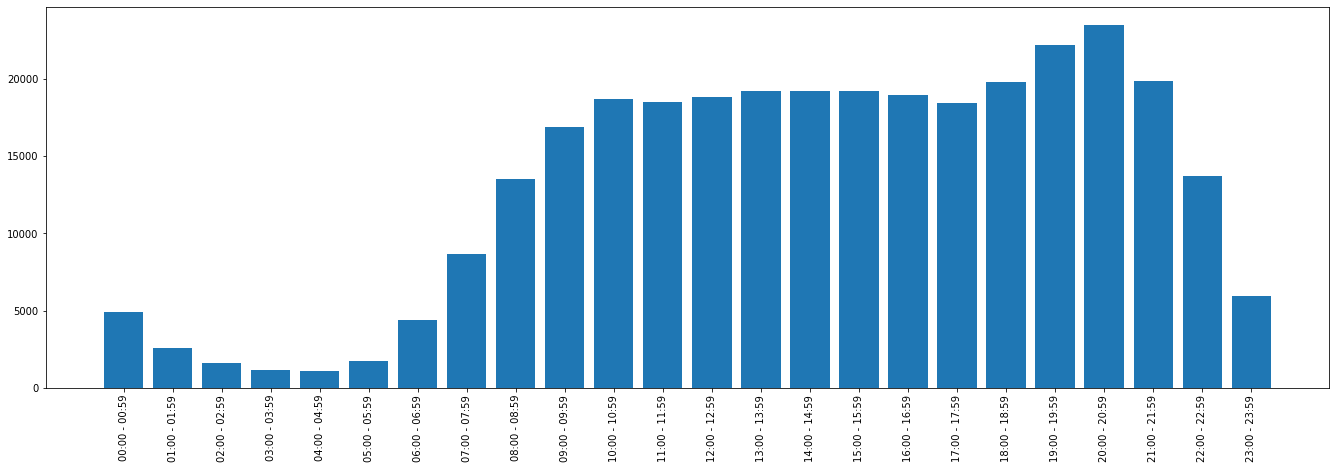

In [81]:
plt.figure(figsize=(23, 7))
plt.bar(purchases_per_hour_2021_count.index, purchases_per_hour_2021_count)
plt.xticks(rotation=90)
plt.show()

### Number of purchases by weekday

In [82]:
weekend_purchases = 0

for idx in train_purchases_df.index:
 if 5 <= pd.Timestamp(train_purchases_df['date'][idx]).weekday() <= 6:
  weekend_purchases += 1

In [83]:
print('About {}% of the purchases is performed during the weekend days'.format(round(weekend_purchases / len(train_purchases_df) * 100)))

About 30% of the purchases is performed during the weekend days


In [84]:
days_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Average']

#### 2020

In [85]:
purchases_per_day_2020 = [0 for _ in range(7)]

for idx in train_purchases_df_2020.index:
  day_idx = pd.Timestamp(train_purchases_df['date'][idx]).weekday()
  purchases_per_day_2020[day_idx] += 1

In [86]:
purchases_per_day_2020.append(round(average(purchases_per_day_2020)))

for idx in range(len(days_of_the_week)):
  print('{}: {}'.format(days_of_the_week[idx], purchases_per_day_2020[idx]))

Monday: 80081
Tuesday: 108652
Wednesday: 88640
Thursday: 88926
Friday: 110867
Saturday: 116760
Sunday: 93167
Average: 98156


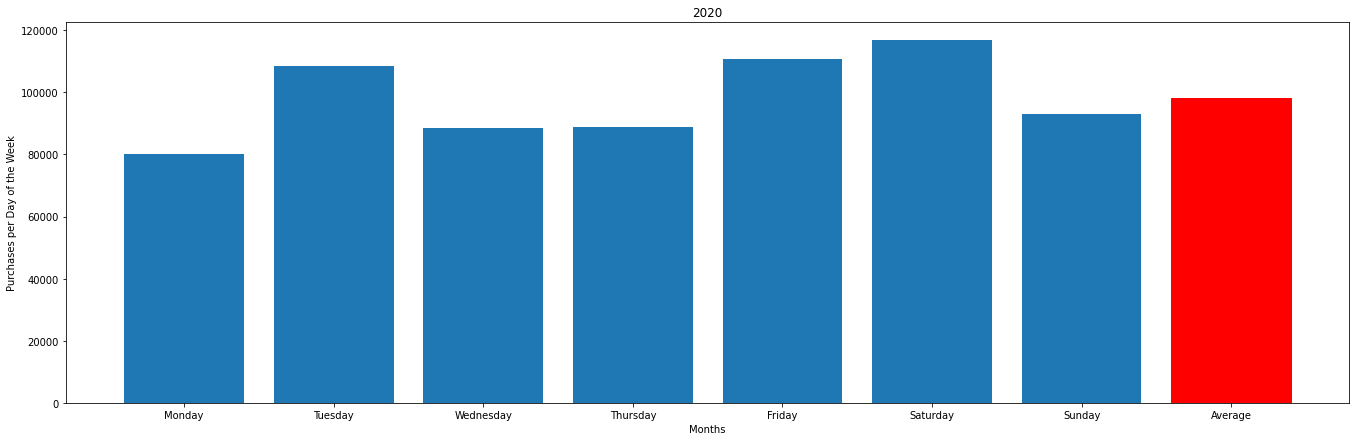

In [87]:
plt.figure(figsize=(23, 7))
barlist1 = plt.bar(days_of_the_week, purchases_per_day_2020)
barlist1[-1].set_color('r')
plt.title('2020')
plt.xlabel('Months')
plt.ylabel('Purchases per Day of the Week')
plt.show()

#### 2021

In [88]:
purchases_per_day_2021 = [0 for _ in range(7)]

for idx in train_purchases_df_2021.index:
  day_idx = pd.Timestamp(train_purchases_df['date'][idx]).weekday()
  purchases_per_day_2021[day_idx] += 1

In [89]:
purchases_per_day_2021.append(round(average(purchases_per_day_2021)))

for idx in range(len(days_of_the_week)):
  print('{}: {}'.format(days_of_the_week[idx], purchases_per_day_2021[idx]))

Monday: 54590
Tuesday: 39173
Wednesday: 38703
Thursday: 41858
Friday: 49335
Saturday: 45554
Sunday: 43694
Average: 44701


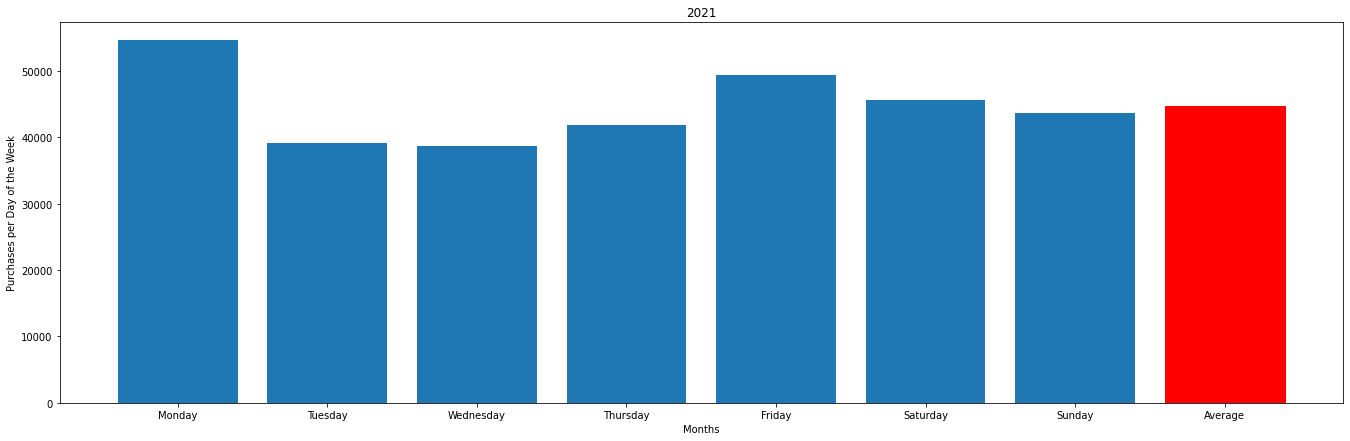

In [90]:
plt.figure(figsize=(23, 7))
barlist2 = plt.bar(days_of_the_week, purchases_per_day_2021)
barlist2[-1].set_color('r')
plt.title('2021')
plt.xlabel('Months')
plt.ylabel('Purchases per Day of the Week')
plt.show()

### Number of purchases by month

#### 2020

In [91]:
months_2020 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Average']

In [92]:
purchases_per_month_2020 = [0 for _ in range(12)]

for idx in train_purchases_df_2020.index:
  month_idx = int(train_purchases_df_2020['date'][idx][5:7]) - 1
  purchases_per_month_2020[month_idx] += 1

In [93]:
purchases_per_month_2020.append(average(purchases_per_month_2020))

for idx in range(len(months_2020)):
  print('{}: {}'.format(months_2020[idx], purchases_per_month_2020[idx]))

January: 38682
February: 31033
March: 37876
April: 58695
May: 48115
June: 60636
July: 53566
August: 59955
September: 72153
October: 63826
November: 90848
December: 71708
Average: 57257.75


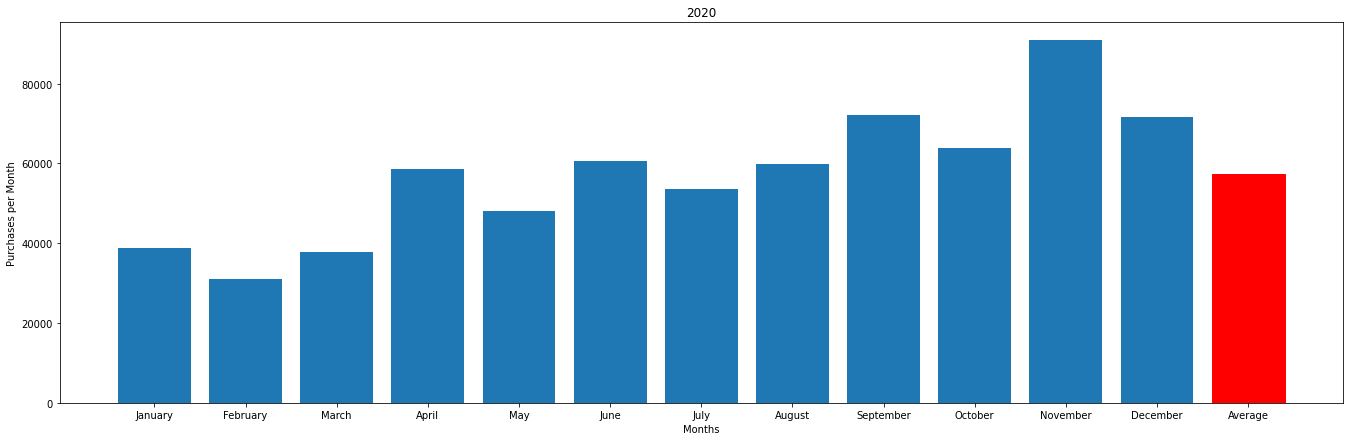

In [94]:
plt.figure(figsize=(23, 7))
barlist3 = plt.bar(months_2020, purchases_per_month_2020)
barlist3[-1].set_color('r')
plt.title('2020')
plt.xlabel('Months')
plt.ylabel('Purchases per Month')
plt.show()

#### 2021

In [95]:
months_2021 = ['January', 'February', 'March', 'April', 'May', 'Average']

In [96]:
purchases_per_month_2021 = [0 for _ in range(5)]

for idx in train_purchases_df_2021.index:
  month_idx = int(train_purchases_df_2021['date'][idx][5:7]) - 1
  purchases_per_month_2021[month_idx] += 1

In [97]:
purchases_per_month_2021.append(average(purchases_per_month_2021))

for idx in range(len(months_2021)):
  print('{}: {}'.format(months_2021[idx], purchases_per_month_2021[idx]))

January: 52923
February: 42912
March: 65709
April: 69745
May: 81618
Average: 62581.4


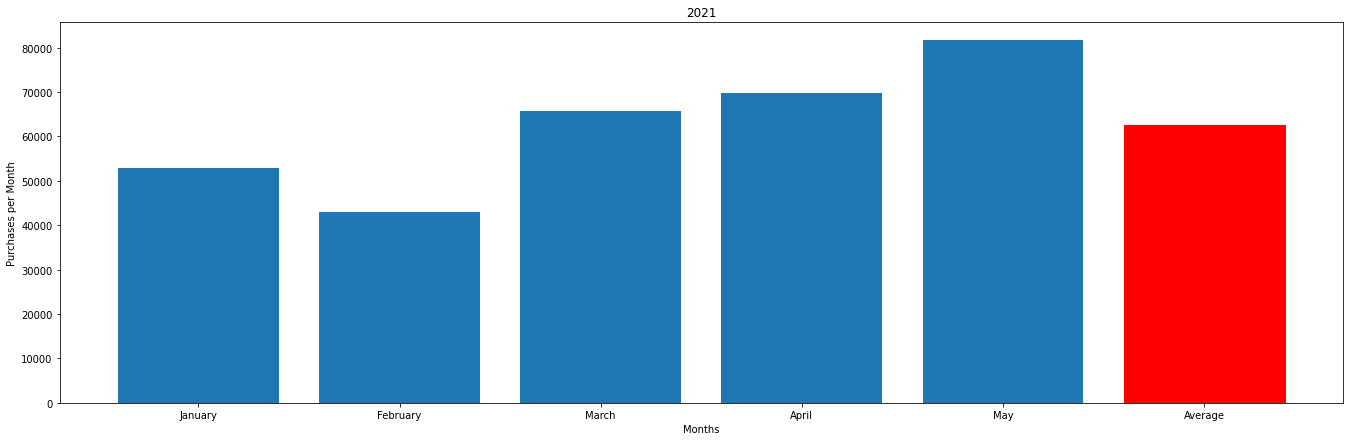

In [98]:
plt.figure(figsize=(23, 7))
barlist4 = plt.bar(months_2021, purchases_per_month_2021)
barlist4[-1].set_color('r')
plt.title('2021')
plt.xlabel('Months')
plt.ylabel('Purchases per Month')
plt.show()

### Top-5 Popular Items by month

In [99]:
max_item_id = max(train_purchases_df['item_id'])

#### 2020

In [100]:
purchased_items_per_month_2020 = [[] for _ in range(12)]

for idx in train_purchases_df_2020.index:
  month_idx = int(train_purchases_df_2020['date'][idx][5:7]) - 1
  purchased_items_per_month_2020[month_idx].append(train_purchases_df_2020['item_id'][idx])

In [101]:
purchased_items_per_month_2020_df = pd.DataFrame(purchased_items_per_month_2020, dtype=int).transpose()

months_2020 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

purchased_items_per_month_2020_df.columns = months_2020

purchased_items_per_month_2020_df

,January,February,March,April,May,June,July,August,September,October,November,December
0,4016.0,13226.0,18626.0,24022.0,26394.0,14532.0,15501.0,24911.0,4243.0,434.0,12534.0,15085.0
1,25117.0,8321.0,12556.0,27613.0,2011.0,18532.0,20563.0,24836.0,10657.0,10852.0,4028.0,14014.0
2,17882.0,4167.0,15623.0,3162.0,28057.0,21534.0,5610.0,11065.0,19908.0,697.0,7096.0,27584.0
3,13538.0,3913.0,20691.0,16660.0,3732.0,27998.0,13226.0,8167.0,18573.0,24940.0,10126.0,27768.0
4,25681.0,13699.0,6419.0,8706.0,26160.0,28139.0,4612.0,7665.0,7828.0,9262.0,8193.0,5066.0
...,...,...,...,...,...,...,...,...,...,...,...,...
90843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23596.0,NaN
90844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16876.0,NaN
90845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,639.0,NaN
90846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21630.0,NaN


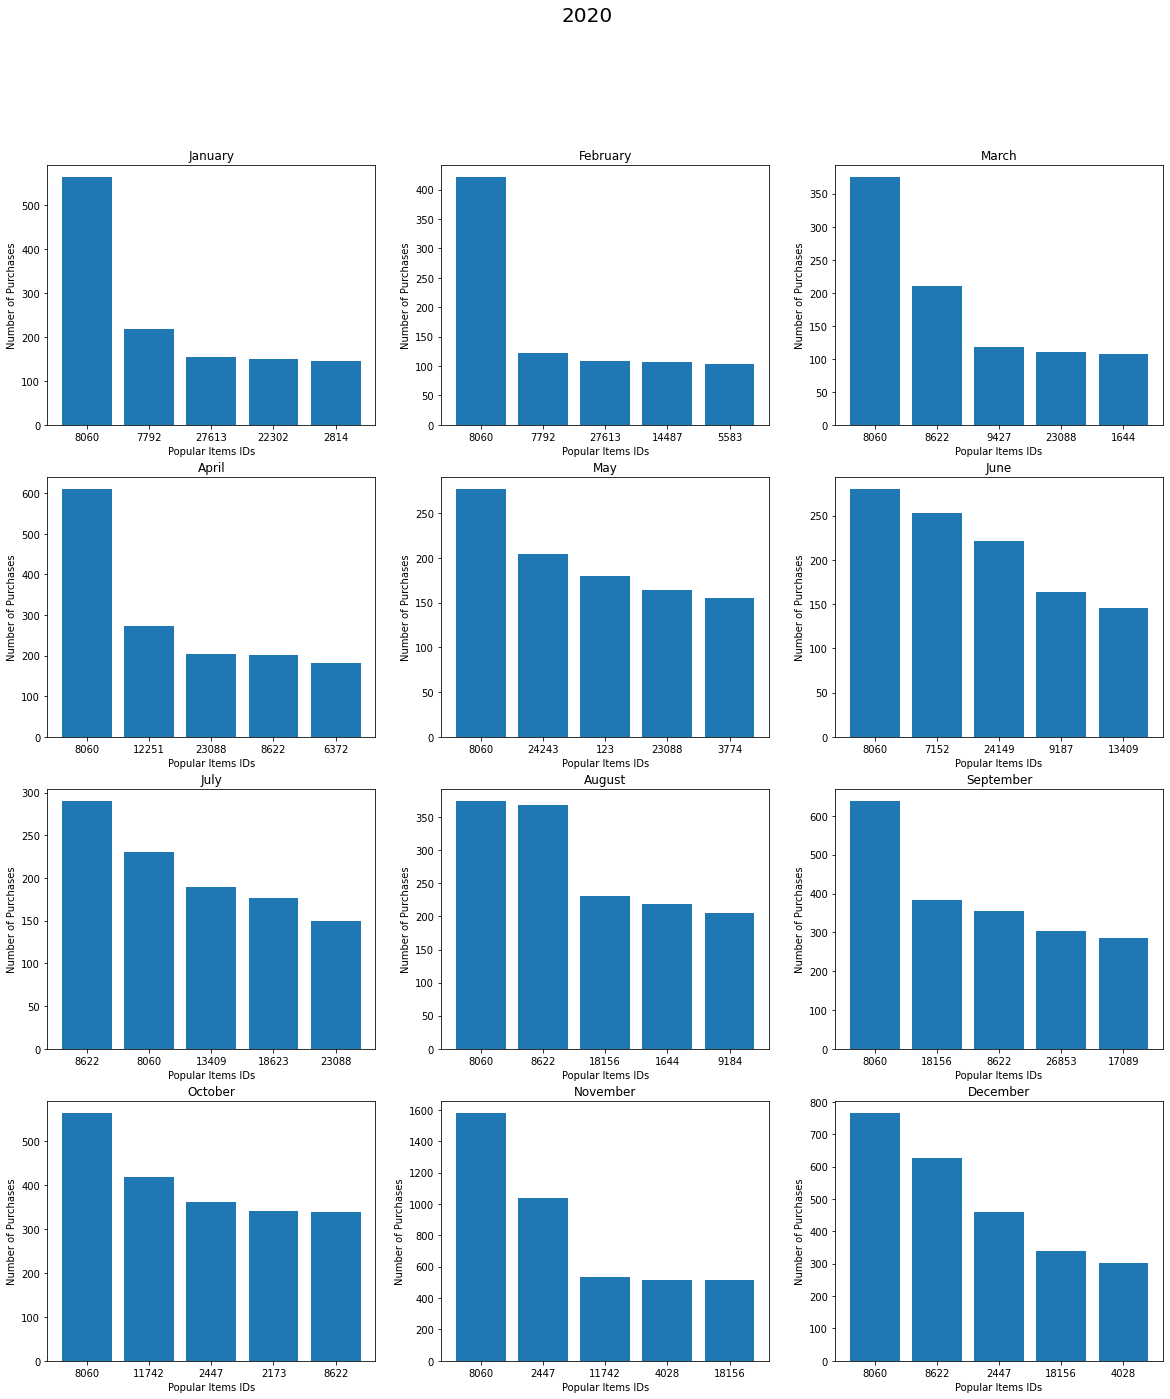

In [102]:
fig, axs = plt.subplots(4, 3, figsize=(20, 22))

fig.suptitle('2020', fontsize=20)

for i in range(12):

  count_df = purchased_items_per_month_2020_df.groupby([months_2020[i]])[months_2020[i]].count()

  sorted_count_df = count_df.sort_values(ascending=False)

  x = sorted_count_df.index.to_numpy()[:5]
  y = sorted_count_df.to_numpy()[:5]

  values = [0, 1, 2, 3, 4]

  axs[int(i/3), i%3].bar(values, y)
  axs[int(i/3), i%3].set_xticks(values, minor=False)
  axs[int(i/3), i%3].set_xticklabels([str(round(elem)) for elem in x])
  axs[int(i/3), i%3].set_title(months_2020[i])
  axs[int(i/3), i%3].set_xlabel('Popular Items IDs')
  axs[int(i/3), i%3].set_ylabel('Number of Purchases')

#### 2021

In [103]:
purchased_items_per_month_2021 = [[] for _ in range(5)]

for idx in train_purchases_df_2021.index:
  month_idx = int(train_purchases_df_2021['date'][idx][5:7]) - 1
  purchased_items_per_month_2021[month_idx].append(train_purchases_df_2021['item_id'][idx])

In [104]:
purchased_items_per_month_2021_df = pd.DataFrame(purchased_items_per_month_2021, dtype=int).transpose()

months_2021 = ['January', 'February', 'March', 'April', 'May']

purchased_items_per_month_2021_df.columns = months_2021

purchased_items_per_month_2021_df

,January,February,March,April,May
0,20208.0,18742.0,11784.0,8345.0,21107.0
1,1631.0,23852.0,1368.0,23502.0,25976.0
2,7046.0,17747.0,17376.0,419.0,8840.0
3,3423.0,27869.0,24738.0,16572.0,4309.0
4,11784.0,20156.0,9683.0,6790.0,25415.0
...,...,...,...,...,...
81613,NaN,NaN,NaN,NaN,21107.0
81614,NaN,NaN,NaN,NaN,3567.0
81615,NaN,NaN,NaN,NaN,23993.0
81616,NaN,NaN,NaN,NaN,16439.0


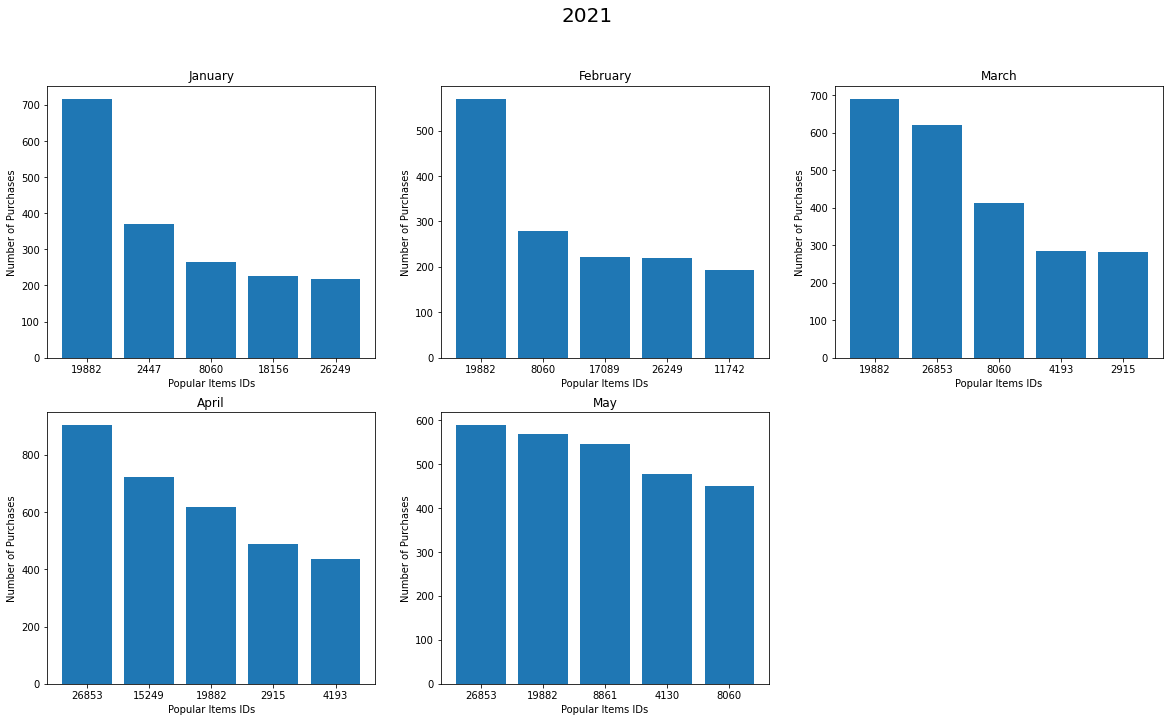

In [105]:
fig, axs = plt.subplots(2, 3, figsize=(20, 11))

fig.delaxes(axs[-1, -1])

fig.suptitle('2021', fontsize=20)

for i in range(5):

  count_df = purchased_items_per_month_2021_df.groupby([months_2021[i]])[months_2021[i]].count()

  sorted_count_df = count_df.sort_values(ascending=False)

  x = sorted_count_df.index.to_numpy()[:5]
  y = sorted_count_df.to_numpy()[:5]

  values = [0, 1, 2, 3, 4]

  axs[int(i/3), i%3].bar(values, y)
  axs[int(i/3), i%3].set_xticks(values, minor=False)
  axs[int(i/3), i%3].set_xticklabels([str(round(elem)) for elem in x])
  axs[int(i/3), i%3].set_title(months_2021[i])
  axs[int(i/3), i%3].set_xlabel('Popular Items IDs')
  axs[int(i/3), i%3].set_ylabel('Number of Purchases')